#**Implementation of deep feed forward neural network**


In [ ]:
# prompt: Can you build me a feed forward network with input dimension 3, 2 hidden layers each of dimension 5 and output layer of dimension 4. As activation function I would like to have tanh.

import torch
import torch.nn as nn

class FeedForwardNetwork(nn.Module):
    def __init__(self):
        super(FeedForwardNetwork, self).__init__()
        self.fc1 = nn.Linear(3, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 4)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the network
model = FeedForwardNetwork()

# Print the model architecture
print(model)


FeedForwardNetwork(
  (fc1): Linear(in_features=3, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=4, bias=True)
  (tanh): Tanh()
)


# **Implementation of a convolutional neural network**


In [ ]:
# prompt: Can you build me a convolutional neural network for a tensor of size 32 x 32 x 3 using a kernel of size 5 x 5 x 3 such that I get 6 output channels

import torch.nn as nn

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)

    def forward(self, x):
        x = self.conv1(x)
        return x

# Create an instance of the network
model = ConvolutionalNetwork()

# Print the model architecture
print(model)


ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
)


**Calculation of the number of parameters in the above convolutional neural network**

In [ ]:
# prompt: Can you generate a code to see the number of parameters in the above convolutional neural network

def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

model = ConvolutionalNetwork()
print(f"Number of parameters: {count_parameters(model)}")


Number of parameters: 456


#**Implementation of an Elman recurrent neural network**

In [ ]:
# prompt: Could you please implement a simple Elman network

import torch
import torch.nn as nn

class ElmanNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ElmanNetwork, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.tanh(self.i2h(combined))
        output = self.h2o(hidden)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

# Example usage:
input_size = 10
hidden_size = 20
output_size = 5

elman_net = ElmanNetwork(input_size, hidden_size, output_size)
print(elman_net)

input_data = torch.randn(1, input_size)
hidden_state = elman_net.init_hidden()

output, next_hidden = elman_net(input_data, hidden_state)
print(f"Output: {output.shape}")
print(f"Next Hidden State: {next_hidden.shape}")


ElmanNetwork(
  (i2h): Linear(in_features=30, out_features=20, bias=True)
  (h2o): Linear(in_features=20, out_features=5, bias=True)
  (tanh): Tanh()
)
Output: torch.Size([1, 5])
Next Hidden State: torch.Size([1, 20])


#**Implementation of a Hopfield network**

In [ ]:
# prompt: Could you please build a Hopfield network with 5 nodes

import numpy as np

class HopfieldNetwork:
    def __init__(self, num_nodes):
        self.num_nodes = num_nodes
        self.weights = np.zeros((num_nodes, num_nodes))

    def train(self, patterns):
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
            np.fill_diagonal(self.weights, 0)

    def update(self, state):
        new_state = np.sign(np.dot(self.weights, state))
        return new_state

    def run(self, initial_state, iterations=10):
        current_state = initial_state
        for _ in range(iterations):
            next_state = self.update(current_state)
            if np.array_equal(next_state, current_state):
                break
            current_state = next_state
        return current_state


# Example usage:
num_nodes = 5

# Create a Hopfield network with 5 nodes
hopfield_net = HopfieldNetwork(num_nodes)

# Define some training patterns (binary values -1 or 1)
patterns = [
    np.array([1, 1, -1, -1, 1]),
    np.array([-1, 1, 1, -1, -1])
]

# Train the network
hopfield_net.train(patterns)

# Test with an initial state
initial_state = np.array([1, -1, 1, -1, -1])
final_state = hopfield_net.run(initial_state)

print(f"Final state: {final_state}")


Final state: [-1. -1.  1. -1. -1.]


# **A simple example of supervised learning**

Epoch [100/1000], Loss: 0.0087
Epoch [200/1000], Loss: 0.0043
Epoch [300/1000], Loss: 0.0041
Epoch [400/1000], Loss: 0.0037
Epoch [500/1000], Loss: 0.0033
Epoch [600/1000], Loss: 0.0026
Epoch [700/1000], Loss: 0.0017
Epoch [800/1000], Loss: 0.0011
Epoch [900/1000], Loss: 0.0005
Epoch [1000/1000], Loss: 0.0003


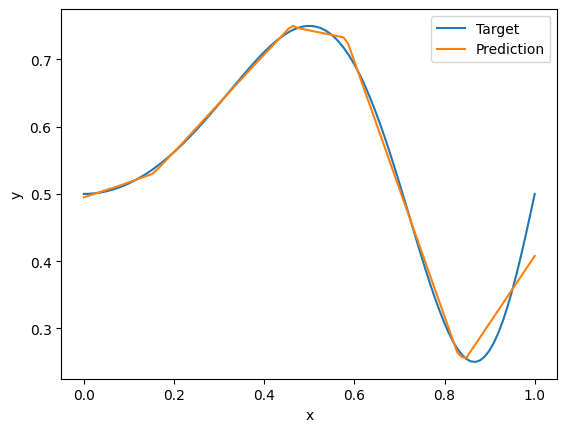

In [ ]:
# prompt: I would now like to learn the function 0.25*(sin(2*pi*x*x)+2.0) with a deep neural feed forward neural network with input dimension 1, 2 hidden layers of dimension 3 and output of dimension 1. As activation function I would like to have relu.

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network
class FeedForwardNetwork(nn.Module):
    def __init__(self):
        super(FeedForwardNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.fc2 = nn.Linear(100, 3)
        self.fc3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the network
model = FeedForwardNetwork()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Generate training data
x_train = np.linspace(0, 1, 100)
y_train = 0.25 * (np.sin(2 * np.pi * x_train * x_train) + 2.0)
x_train = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

# Train the network
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


# Plot the results
y_pred = model(x_train).detach().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), label='Target')
plt.plot(x_train.numpy(), y_pred, label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

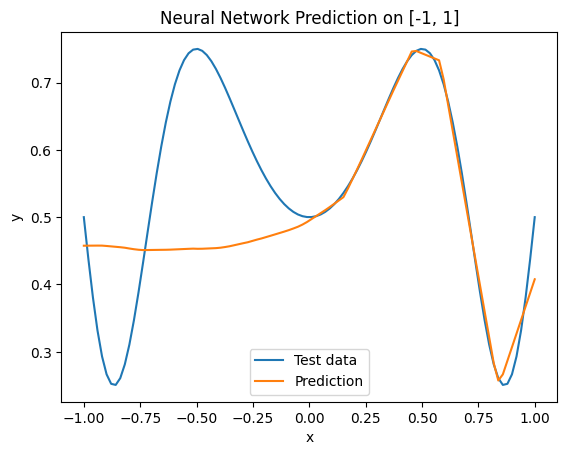

In [ ]:
# prompt: Can you generate test data on [-1,1] for the above function and plot the function and the prediction results on this interval

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate test data on [-1, 1]
x_test = np.linspace(-1, 1, 100)
x_test = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)

# Make predictions
y_pred = model(x_test).detach().numpy()
y_test = 0.25 * (np.sin(2 * np.pi * x_test * x_test) + 2.0)

# Plot the results
plt.plot(x_test.numpy(), y_test, label='Test data')
plt.plot(x_test.numpy(), y_pred, label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Prediction on [-1, 1]')
plt.legend()
plt.show()


#**A simple example of a Markov decision process and Q-learning**


In [ ]:
# prompt: Can you implement a simple Markov decision process with 3 possible states, two possible actions in each state and corresponding  rewards. Please apply Q learning to find the optimum

import numpy as np

# Define the MDP
states = [0, 1, 2]  # Three possible states
actions = [0, 1]  # Two possible actions in each state
rewards = {
    (0, 0): 1,
    (0, 1): -1,
    (1, 0): -1,
    (1, 1): 2,
    (2, 0): 1, #change to -5 to see a difference
    (2, 1): -1,
}
transitions = {
    (0, 0): 1,  # From state 0, action 0 leads to state 1 with probability 1
    (0, 1): 2,  # From state 0, action 1 leads to state 2 with probability 1
    (1, 0): 0,  # From state 1, action 0 leads to state 0 with probability 1
    (1, 1): 2,  # From state 1, action 1 leads to state 2 with probability 1
    (2, 0): 0,  # From state 2, action 0 leads to state 0 with probability 1
    (2, 1): 1,  # From state 2, action 1 leads to state 1 with probability 1
}

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 10

# Initialize Q-table
q_table = np.zeros((len(states), len(actions)))

# Q-learning algorithm
for episode in range(num_episodes):
  print(episode)
  current_state = np.random.choice(states)
  #done = False
  #while not done:
    # Choose action using epsilon-greedy policy
  if np.random.uniform(0, 1) < epsilon:
    action = np.random.choice(actions)
  else:
    action = np.argmax(q_table[current_state])

    # Take action and observe reward and next state
  next_state = transitions[(current_state, action)]
  reward = rewards[(current_state, action)]

    # Update Q-value
  q_table[current_state, action] = q_table[current_state, action] + \
                                     alpha * (reward + gamma * np.max(q_table[next_state]) -
                                              q_table[current_state, action])

  current_state = next_state
    #if current_state == 2:  # Consider state 2 as a terminal state
     # done = True

# Print the optimal policy
print("Optimal policy:")
for state in states:
  optimal_action = np.argmax(q_table[state])
  print(f"State {state}: Action {optimal_action}")


0
1
2
3
4
5
6
7
8
9
Optimal policy:
State 0: Action 0
State 1: Action 1
State 2: Action 0
